
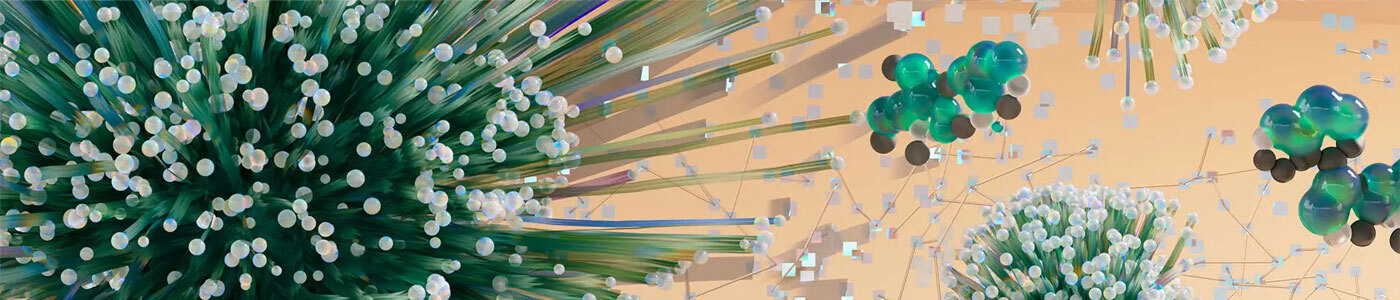
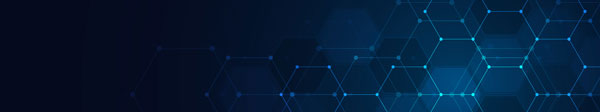

In [1]:
%reload_ext openad.notebooks.styles

<!-- Header banner -->
<div class="banner"><div>Generation Models</div><b>OpenAD <span>Tutorial</span></b></div>

# Generation Models



To setup our model generation services we will first catalog the service in our toolkit and name it 'gen' which is the name we will give the main services that use torch framework. and 'moler' for the generation service using the tensorflow framework.

These two service names will be the Namespace prefix for their respective services.

### Catalog our  Generation Models:

***-First lets catalog our generative model  set of functions that include Paccmann,Reinvent, torch Drug and Guacamol services.***

run the followng from your Openad Command line or from a notebook %openad

 `catalog model service from 'git@github.com:acceleratedscience/generation_inference_service.git' as 'gen'`
 
***-Secondly lets catalog the Moler molecule generation.***

run the followng from your Openad Command line or from a notebook %openad

 `catalog model service from 'git@github.com:acceleratedscience/moler_inference_service.git' as 'moler'`
 

***To start these two services you can run the following commands:***
 
 `model service up  'gen'`
 
 `model service up  'moler'`


Once the service is cataloged, we can set the service to start up with the `model service up` command.

In [ ]:
%openad model service status

### Working Model OpenAD Magic Commands.

When using Magic commands to access the Openad toolkit you have 2 options 

1. `%openad` provides a simple user interface that provides styled and formatted objects back to the notebook. Tables use pandas Dataframe Styler object. These can be converted back to data frame objects using `.data` on the object or using the in memory assistant which will copy the last result to a file , dataframe or to the dataviewer.
  When this is available you will see `Next up, you can run: result open/edit/copy/display/as dataframe/save [as '<filename.csv>']` in the output.
  
  This magic command is the recommended version to use as it willprovide all warning and results visually.
  
2. `%openadd` is the second form that allows you to return api style results in dataframe or list formats that can be used programatically for functions or flows in your notebook. This is good for prebuilt notebook process flows.

## Lets Get Started

The following Data Generation Services are basedon GT4SD. Details can be found at https://arxiv.org/abs/2207.03928

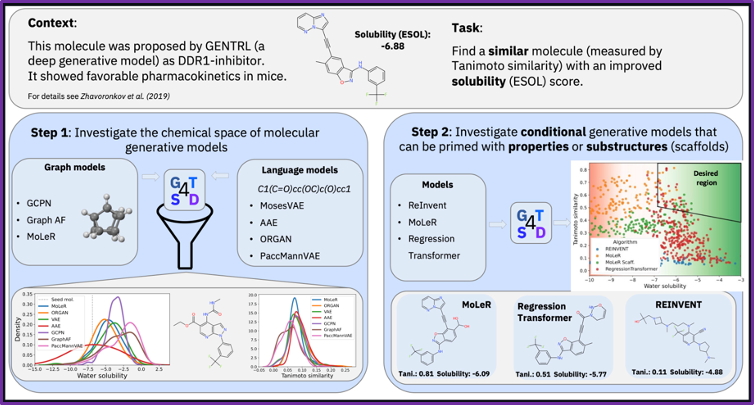

The following commands will show you the respective functions enabled for `moler` and `gen`

In [ ]:
%openad gen ?
%openad moler ?

## MoleR Generator functions

These use Tensorflow and for GPU sharing purpses are kept on a separate system.

Details for these functions can be found at:

https://arxiv.org/abs/2103.03864

https://github.com/microsoft/molecule-generation

***MoLeRDefaultGenerator*** Configuration to generate compounds using default parameters of MoLeR.

In [ ]:
%openad moler generate with MoLeRDefaultGenerator data  sample 10

In [ ]:
result = %openad result as dataframe
smiles = result.data["result"].to_list()

***MolGXQM9Generator*** Configuration to generate compounds with given HOMO and LUMO energies.

In [ ]:
%openad moler generate with MolGXQM9Generator data sample 10

In [ ]:
result = %openad result as dataframe
smiles.extend(result.data["result"].to_list())

In [ ]:
properties_all = [
    "molecular_weight",
    "number_of_aromatic_rings",
    "number_of_h_acceptors",
    "number_of_atoms",
    "number_of_rings",
    "number_of_rotatable_bonds",
    "number_of_large_rings",
    "number_of_heterocycles",
    "number_of_stereocenters",
    "is_scaffold",
    "bertz",
    "tpsa",
    "logp",
    "qed",
    "plogp",
    "penalized_logp",
    "lipinski",
    "sas",
    "esol",
]
%openadd prop get molecule property {properties_all} for {smiles} merge with mols

In [ ]:
%openad show molecules

## Now lets look at the main set of generational Algorithms cataloged under the name 'gen'

## Auto Encoders

***VaeGenerator*** Configuration to generate molecules using a variational autoencoder

In [ ]:
%openadd gen generate with VaeGenerator data  for "{'target':''}"  sample 10

***AaeGenerator*** Configuration to generate molecules using an adversarial autoencoder

In [ ]:
%openadd gen generate with AaeGenerator data  for "{'target':''}"  sample 10

***PaccMannVAEGenerator*** Configuration to generate molecules with PaccMannVAE.

Implementation from the paper: https://doi.org/10.1016/j.isci.2021.102269

In [ ]:
%openadd gen generate with PaccMannVAEGenerator data  sample 10

## Guacamol Organ Generator

***OrganGenerator*** Configuration to generate molecules using Objective-Reinforced Generative Adversarial Network

In [ ]:
print("running OrganGenerator")
%openadd gen generate with OrganGenerator data  for "{'target':''}"  sample 10

## Torch Drug Generators 

***TorchDrugGraphAF*** Interface for TorchDrug flow-based autoregressive graph algorithm (GraphAF).
    Currently supported algorithm versions are "zinc250k_v0", "qed_v0" and "plogp_v0".


In [ ]:
%openadd gen generate with TorchDrugGraphAF data  sample 10 using ( algorithm_version=zinc250k_v0 )

***TorchDrugGCPN*** Interface for TorchDrug Graph-convolutional policy network (GCPN) algorithm.
    Currently supported algorithm versions are "zinc250k_v0", "qed_v0" and "plogp_v0".

In [ ]:
%openadd gen generate with TorchDrugGCPN data  sample 10 using ( algorithm_version=zinc250k_v0 )

## Regression Transformer

Details on the Regression Transformer can be found at https://www.nature.com/articles/s42256-023-00639-z

With Regression transfomer we can substitute variables carrying masks as per below.

***RegressionTransformerMolecules*** Configuration to generate molecules given a continuous property target and a molecular sub-structure.

Implementation from the paper: https://arxiv.org/abs/2202.01338.

In [ ]:
mask = '<esol>-3.53|[Br][C][=C][C][MASK][MASK][=C][C][=C][C][=C][Ring1][MASK][MASK][Branch2_3][Ring1][Branch1_2]'
%openadd gen generate with RegressionTransformerMolecules data for '{mask}' Sample 5 \
USING (algorithm_version=solubility search=sample temperature=1.4 tolerance=5.0 ) 

When substituting into the command dictionaries we need to use an alternate substitution method using $ due to limits in notebook parsing.

In [ ]:
MY_SMILES= 'C12C=CC=NN1C(C#CC1=C(C)C=CC3C(NC4=CC(C(F)(F)F)=CC=C4)=NOC1=3)=CN=2'
MY_PARAMS = { "fraction_to_mask": 0.1, "property_goal": { "<esol>": 0.234 } }
%openadd gen generate with RegressionTransformerMolecules data for $MY_SMILES sample 5 \
using(algorithm_version=solubility  search=sample temperature=1.5 tolerance=60.0 sampling_wrapper = "$MY_PARAMS" )

***RegressionTransformerProteins*** Configuration to generate protein given a continuous property target and a partial AAs.

Implementation from the paper: https://arxiv.org/abs/2202.01338. It can also predict the property given a full sequence.


In [ ]:
target = 'GSQEVNSNASPEEAEIARKAGATTWTEKGNKWEIRI'
target=f"<stab>[MASK][MASK][MASK][MASK][MASK]|{target}"
%openad gen generate with RegressionTransformerProteins data for '{target}' sample 1 \
using ( algorithm_version=stability search=greedy )

## Paccmann RL Generator
Details https://github.com/PaccMann/paccmann_generator

***PaccMannRLProteinBasedGenerator*** Configuration to generate compounds with high affinity to a target protein.

Implementation from the paper: https://doi.org/10.1088/2632-2153/abe808

In [ ]:
string = """
MSSSSWLLLSLVAVTAAQSTIEEQAKTFLDKFNHEAEDLFYQSSLASWNYNTNITEENVQ
NMNNAGDKWSAFLKEQSTLAQMYPLQEIQNLTVKLQLQALQQNGSSVLSEDKSKRLNTIL
NTMSTIYSTGKVCNPDNPQECLLLEPGLNEIMANSLDYNERLWAWESWRSEVGKQLRPLY
EEYVVLKNEMARANHYEDYGDYWRGDYEVNGVDGYDYSRGQLIEDVEHTFEEIKPLYEHL
HAYVRAKLMNAYPSYISPIGCLPAHLLGDMWGRFWTNLYSLTVPFGQKPNIDVTDAMVDQ
AWDAQRIFKEAEKFFVSVGLPNMTQGFWENSMLTDPGNVQKAVCHPTAWDLGKGDFRILM
CTKVTMDDFLTAHHEMGHIQYDMAYAAQPFLLRNGANEGFHEAVGEIMSLSAATPKHLKS
IGLLSPDFQEDNETEINFLLKQALTIVGTLPFTYMLEKWRWMVFKGEIPKDQWMKKWWEM
KREIVGVVEPVPHDETYCDPASLFHVSNDYSFIRYYTRTLYQFQFQEALCQAAKHEGPLH
KCDISNSTEAGQKLFNMLRLGKSEPWTLALENVVGAKNMNVRPLLNYFEPLFTWLKDQNK
NSFVGWSTDWSPYADQSIKVRISLKSALGDKAYEWNDNEMYLFRSSVAYAMRQYFLKVKN
QMILFGEEDVRVANLKPRISFNFFVTAPKNVSDIIPRTEVEKAIRMSRSRINDAFRLNDN
SLEFLGIQPTLGPPNQPPVSIWLIVFGVVMGVIVVGIVILIFTGIRDRKKKNKARSGENP
YASIDISKGENNPGFQNTDDVQTSF
"""
target_protein = "".join(filter(str.isalpha, (list(string))))

In [ ]:
%openad show protein '{target_protein}'

In [ ]:
%openad gen generate with PaccMannRLProteinBasedGenerator data  for '{target_protein}' sample 20

## ReinventGenerator 

***ReinventGenerator*** Configuration to generate molecules using the REINVENT algorithm. It generates the molecules minimizing the distances between the scaffolds.


In [ ]:
MY_SMILES= 'C12C=CC=NN1C(C#CC1=C(C)C=CC3C(NC4=CC(C(F)(F)F)=CC=C4)=NOC1=3)=CN=2'
%openad gen generate with ReinventGenerator data  for {MY_SMILES} sample 10 \
USING (randomize=True sample_uniquely=True batch_size=5)

## SMILES LSTM Generators using Gaucamol Base Lines implemented through GT4SD

https://arxiv.org/abs/1701.01329

***SMILESLSTMPPOGenerator*** Configuration to generate optimizied molecules using recurrent neural networks with hill climbing algorithm


In [ ]:
%openadd gen generate with SMILESLSTMPPOGenerator data for "{'isomer_scorer': {'target': 5.0, 'target_smile': 'NCCCCC'}}"\
sample 20 using (num_epochs=2 episode_size=10 optimize_batch_size=2)

***SMILESLSTMHCGenerator*** Configuration to generate optimized molecules using recurrent neural networks with hill climbing algorithm.


In [ ]:
%openadd gen generate with SMILESLSTMHCGenerator data  for  "{'isomer_scorer': {'target': 5.0, 'target_smile': 'NCCCCC'}}"  \
sample 20 using( mols_to_sample=100 max_len=2 optimize_batch_size=3 n_epochs=2 random_start=True)

***SMILESGAGenerator***  Configuration to generate optimizied molecules using SMILES Genetic algorithm

In [ ]:
%openad gen generate with SMILESGAGenerator data  for  "{'isomer_scorer': {'target': 5.0, 'target_smile': 'NCCCCC'}}" \
sample 20 using( random_start=True  )

# Guacamol Graph Generators

***GraphGAGenerator***
Configuration to generate optimizied molecules using Graph-Based Genetic algorithm


In [ ]:
%openad gen generate with GraphGAGenerator data  for  "{'isomer_scorer': {'target': 5.0, 'target_smile': 'NCCCCC'}}"\
sample 20 using( random_start=True  )

***GraphMCTSGenerator***
Configuration to generate optimizied molecules using Graph-based Genetic Algorithm and Generative Model/Monte Carlo Tree Search for the Exploration of Chemical Space


In [ ]:
%openad gen generate with GraphMCTSGenerator data for "{'isomer_scorer': {'target': 5.0, 'target_smile': 'NCCCCC'}}"\
Sample 20 using ( init_smiles=CC population_size=5 generations=5 num_sims=10  max_children=5 max_atoms=10)

## Catalyst Generator

***CatalystGenerator*** Configuration to generate catalysts with a desired binding energy.

In [ ]:
%openadd gen generate with CatalystGenerator data for 1 sample 20

In [ ]:
%openadd gen generate with CatalystGenerator data for 10 sample 20 using(number_of_points=32 number_of_steps=50 generated_length=100)

## Key Bert

Configuration to generate keywords.

If the  model is not found in the cache, models are collected from https://www.sbert.net/docs/pretrained_models.html.
distilbert-base-nli-stsb-mean-tokens is recommended for english, while xlm-r-bert-base-nli-stsb-mean-tokens for all
other languages as it support 100+ languages.

In [ ]:
%openad gen generate with KeyBERTGenerator data for\
'samples_per_protein: number of points sampled per protein.It has to be greater than 1. protein_embedding_encoder_params: parameter for the protein embedding encoder.mprotein_embedding_encoder: protein embedding encoder.'